# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1.) Book Review data set 

2.) We will be predicting whether a book review is positive or nor. The label will be the Positive Review column

3.) This is a supervised learning problem. It is a binary classification problem (Positive Review or not)

4.) The features used in this problem are Raw Review text data. That is the Review column

5.) It will enable the author/production company to forecast how their book will be received by the public early on. They can use information to make business decisions and optimize marketing budgets especially for books likely to underperform



## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
df.shape

(1973, 2)

In [4]:
df.describe()

,Review,Positive Review
count,1973,1973
unique,1865,2
top,I have read several of Hiaasen's books and lov...,False
freq,3,993


In [5]:
df.duplicated().sum()

108

In [6]:
df.isnull().sum()

Review             0
Positive Review    0
dtype: int64

In [7]:
df['Positive Review'].value_counts()

False    993
True     980
Name: Positive Review, dtype: int64

In [8]:
df.dtypes

Review             object
Positive Review      bool
dtype: object

In [9]:
for i, review in enumerate(df["Review"].loc[:5]):
    preview = df["Positive Review"][i]
    print(f"Review {i+1}: \n {review}\n")
    print(f"Positive review : {preview}\n")


Review 1: 
 This was perhaps the best of Johannes Steinhoff's books, since it does not  deal with his own stellar yet tragic WW II and post war career. The  insights of the average person living in Germany are of great importance to  both social and military historians alike. Steinhoff offered this  collective testament as a warning to all of us regarding war and the rise  of a dictator. As Johannes said in an interview, &quot;It is always the  civilians who suffer the most, yet are remembered the least.&quot


Positive review : True

Review 2: 
 This very fascinating book is a story written in the form of numerous letters and personal diary entries made by the principle character of the book.  It chronicals the life of a young Scottish woman forced to live first in China then Japan.  Well written and historically accurate, it's obvious the author is intimately familiar with the the culture, customs, history and life style of Japan.  This makes the book that much more interesting and f

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


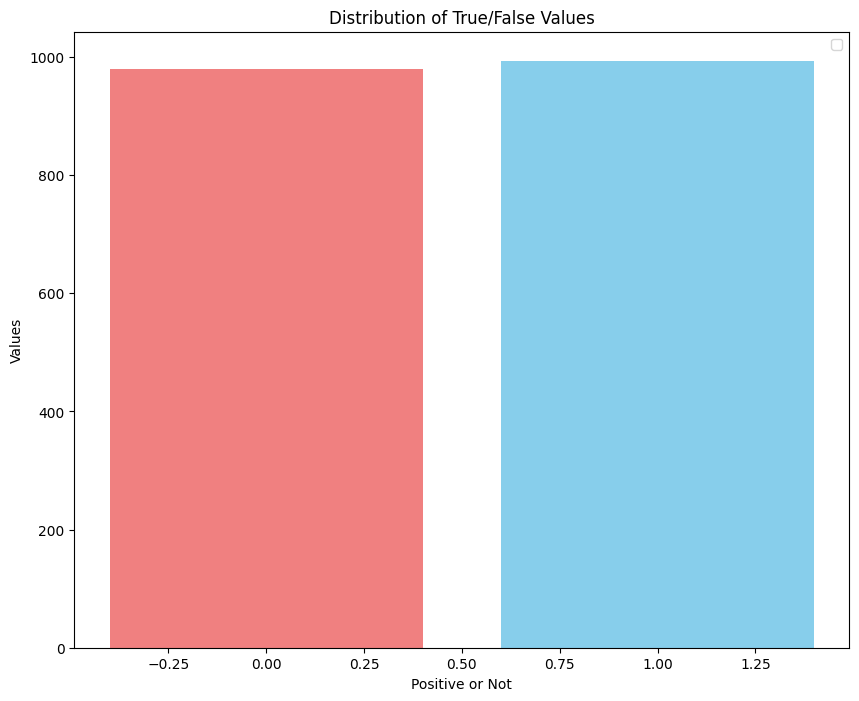

In [18]:
import matplotlib.pyplot as plt

positive_or_not = list(df["Positive Review"].unique())
values = list(df['Positive Review'].value_counts())

plt.figure(figsize = (10,8))
plt.bar(positive_or_not, values, color=['skyblue', 'lightcoral'])
plt.title("Distribution of True/False Values")
plt.legend()
plt.xlabel("Positive or Not") 
plt.ylabel("Values")
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

There is only one feature involved and that is the review.

Since it is a NLP problem, the data preparation techniques will be different from common techniques used for binary classification problems.
Some NLP techniques I will use to prepare the data for modeling are:
- Lowercase Conversion: I will use this make sure all text cases are consistent
- Punctuation Removal: I will get rid of punctuation marks as they often don't contribute to meaning in NLP tasks.
- Stop Word Removal: I will eliminate such words (e.g "a", "the") as again they carry little semantic value.
- Lemmatization - Reducing the words to their base form to reduce vocabulary size
- Tokenization - Splitting the text into individual words and phrases.
- 
The model I will use will be a recurrent neural network ( Bidirectional LSTM)

Plan:
- I will use gensim to do preprocessing
- I will be applying word embeddings with Word2Vec to present words as dense vectors.
- Build the model - embedding layer, 2 hidden layers, output layer
- While compiling the model, I will use Stochastic Gradient Descent as my optimizer with 0.1 learning rate while my loss function will be binary cross entropy
- Train the model with different number of epochs(50 initially then use trial and error to get optimal number), validation split using 20% of training data
- Depending on how my model performs, I'm going to be changing the number of hidden layers (starting from 2 layers), epochs, dropout layers (for regularization), and learning rate for the optimizer.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [87]:
import tensorflow.keras as keras
import numpy as np
from keras import layers
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.optimizers import SGD

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [62]:
X = df["Review"]
y = df["Positive Review"]

In [63]:
X.head()

0    This was perhaps the best of Johannes Steinhof...
1    This very fascinating book is a story written ...
2    The four tales in this collection are beautifu...
3    The book contained more profanity than I expec...
4    We have now entered a second time of deep conc...
Name: Review, dtype: object

In [64]:
original_X = X
X = X.apply(lambda row: gensim.utils.simple_preprocess(row))

In [65]:
X.head()

0    [this, was, perhaps, the, best, of, johannes, ...
1    [this, very, fascinating, book, is, story, wri...
2    [the, four, tales, in, this, collection, are, ...
3    [the, book, contained, more, profanity, than, ...
4    [we, have, now, entered, second, time, of, dee...
Name: Review, dtype: object

Gensim has taken care of the following preprocessing techniques: Lowercase Conversion, Punctuation Removal, Stop Word Removal, Lemmatization, Tokenization 

Now time to split. Taking our preprocessed text data set and splitting into training and test sets with 80% of the data being the training set. 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
X_train.head()

416     [boring, tasteless, and, unoriginal, photograp...
628     [the, book, starts, off, ok, with, good, intro...
332     [one, at, the, front, the, really, own, words,...
1338    [ever, since, starting, on, the, simple, abund...
874     [this, book, was, written, in, updated, in, it...
Name: Review, dtype: object

Now that the data has been preprocessed and we have our training data, we will train a Word2Vec model using Gensim using the training data

In [68]:
word2vec_model = gensim.models.Word2Vec(X_train, vector_size=100, window=5, min_count=1)

In [69]:
len(word2vec_model.wv.key_to_index)

18699

In [70]:
'tasteless' in word2vec_model.wv.key_to_index

True

In [71]:
word2vec_model.wv['tasteless']

array([-9.35026258e-03,  1.95322577e-02,  5.08490950e-03, -1.60403829e-03,
       -6.24984922e-03, -1.09073389e-02,  1.45867225e-02,  3.65193933e-02,
       -2.35879491e-03, -1.51860332e-02, -1.40575413e-02, -1.79142393e-02,
        2.31115730e-03,  1.32494885e-02,  3.86057911e-03, -1.28647611e-02,
        3.85110383e-03, -7.22050341e-03, -3.88521561e-03, -1.19900219e-02,
        1.01185311e-03,  5.37627144e-03,  1.06039294e-03, -1.28867861e-03,
       -1.11611420e-02, -3.97873484e-03, -8.69579986e-03, -1.32642528e-02,
       -1.96088012e-02,  1.01671144e-02,  7.37529626e-05, -8.33998434e-03,
       -2.39190715e-03, -5.14205685e-03, -4.85836389e-03,  1.53700775e-02,
        7.17181992e-03,  3.81031656e-03, -7.60712614e-03, -8.40491895e-03,
       -1.22409137e-02,  1.50992384e-03, -1.20631168e-02,  3.52880335e-03,
        1.07097309e-02, -4.23467113e-03, -9.65783279e-03, -1.41947018e-02,
        1.84181351e-02,  1.31602883e-02,  8.38891696e-03, -8.17976892e-03,
       -4.38882876e-03, -

In [72]:
word2vec_model.wv.most_similar('tasteless')

[('digging', 0.8621149063110352),
 ('brains', 0.8604305982589722),
 ('zolli', 0.8583526611328125),
 ('sends', 0.8572174906730652),
 ('comical', 0.8567001819610596),
 ('dominick', 0.8564298152923584),
 ('meetings', 0.8563598990440369),
 ('skydiver', 0.8561183214187622),
 ('jettisoned', 0.8558946847915649),
 ('laboratory', 0.8558191657066345)]

In [73]:
top_25 = word2vec_model.wv.index_to_key[:25]
top_25

['the',
 'of',
 'and',
 'to',
 'is',
 'in',
 'it',
 'this',
 'book',
 'that',
 'for',
 'with',
 'as',
 'was',
 'not',
 'you',
 'on',
 'are',
 'but',
 'have',
 'he',
 'be',
 'his',
 'one',
 'or']

In [74]:
pd.DataFrame({w:word2vec_model.wv[w] for w in top_25}).T.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_1620/1756952410.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.DataFrame({w:word2vec_model.wv[w] for w in top_25}).T.style.background_gradient(cmap='coolwarm').set_precision(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
the,-0.61,0.77,0.32,0.28,-0.33,-1.87,1.09,2.23,-1.48,-1.04,-0.63,-1.29,-0.19,1.10,0.47,-0.81,0.61,-0.44,-0.91,-2.46,1.08,0.68,1.21,-0.03,0.17,0.21,-0.85,-0.15,-0.98,0.88,0.44,-0.56,0.02,-1.09,-0.60,0.83,0.13,0.03,-0.26,-1.09,-0.38,-0.56,-0.77,0.03,0.48,-0.20,-1.21,0.43,0.62,0.38,0.67,-0.37,-0.01,-0.71,0.55,0.24,0.39,-0.48,-1.34,0.87,0.10,-0.35,-0.46,-0.25,-0.62,1.20,0.47,0.41,-1.00,0.76,0.07,0.59,0.27,-1.06,0.84,0.76,0.48,0.24,-0.63,0.10,-0.96,0.20,-0.60,0.84,0.08,-0.53,0.19,1.03,1.78,0.71,1.08,0.40,0.31,0.02,2.02,-0.06,-0.55,-1.45,0.43,1.07
of,-1.11,0.60,0.17,-0.59,0.38,-1.83,0.95,2.74,-1.36,-1.05,-1.20,-1.29,-0.94,1.02,0.84,-0.84,0.17,-0.72,-0.68,-2.07,1.00,0.25,1.74,0.14,-0.12,-0.21,-0.78,-1.14,-0.82,1.61,1.39,-0.87,-0.63,-1.15,-0.05,1.21,0.29,0.68,0.34,-0.86,0.05,-0.95,-1.19,0.55,0.23,-0.25,-0.45,0.10,0.80,0.58,1.51,-0.58,-0.25,-0.81,0.46,0.33,0.46,-0.19,-1.49,0.29,-0.34,-0.19,-0.59,-0.61,-0.60,1.20,1.18,-0.19,-0.95,0.63,-0.15,0.66,0.28,-0.37,0.74,0.87,-0.08,0.45,-0.34,-0.31,-0.74,0.33,0.01,0.46,0.19,-0.83,-0.18,0.96,1.68,0.26,1.67,0.32,0.77,-0.60,2.02,0.14,-0.09,-1.43,-0.24,0.88
and,-1.02,0.80,0.18,-0.44,0.25,-1.96,0.91,2.65,-0.95,-1.18,-0.88,-1.34,-0.44,0.78,0.89,-1.06,0.26,-0.73,-0.65,-1.89,0.86,0.32,0.92,-0.14,-0.11,-0.09,-0.74,-0.74,-1.04,0.97,0.98,-0.75,-0.16,-0.96,-0.40,1.21,0.30,0.00,-0.23,-0.99,-0.30,-0.69,-0.85,0.20,0.60,-0.25,-0.55,-0.17,0.70,0.74,1.06,-0.70,-0.07,-0.71,0.23,0.29,0.65,-0.20,-1.20,0.53,-0.12,-0.01,-0.37,-0.46,-0.76,1.01,0.74,0.24,-1.10,0.73,-0.36,0.55,0.73,-0.61,0.88,0.87,0.37,0.40,-0.87,0.01,-0.68,0.30,-0.42,1.14,0.11,-0.46,-0.08,0.98,1.59,0.36,1.23,0.59,0.55,-0.19,1.90,0.19,-0.11,-1.14,0.18,0.64
to,-1.17,1.28,0.09,-0.43,0.39,-1.82,0.85,2.80,-0.24,-1.69,-0.50,-0.94,0.17,0.21,1.20,-0.90,0.32,-1.26,-0.64,-1.34,0.48,0.53,0.29,-0.55,-0.67,0.16,-0.54,-0.55,-1.46,0.34,1.07,-0.60,0.22,-1.07,-0.54,1.64,0.88,-0.22,-0.85,-0.80,-0.09,-0.77,-0.72,-0.32,1.22,-0.48,-0.19,-0.83,0.84,1.04,0.89,-1.01,-0.00,-0.74,-0.28,0.22,0.74,0.06,-0.65,0.53,0.24,0.27,0.53,-0.42,-1.22,0.57,0.23,0.89,-1.45,0.81,-0.57,0.56,1.21,-0.05,1.21,0.77,0.38,0.24,-1.18,-0.18,-0.46,-0.05,-0.91,1.96,-0.14,-0.69,0.35,0.99,0.98,-0.01,0.79,1.07,0.72,0.18,1.56,0.54,0.22,-0.81,0.26,-0.37
is,-0.84,1.13,-0.14,-0.09,0.35,-1.12,0.92,1.91,-1.37,-0.94,-1.06,-0.48,-0.00,0.61,1.00,-0.49,0.40,-0.63,-0.56,-1.72,0.90,0.27,1.49,-0.33,-0.25,0.52,-0.84,-0.44,-1.22,0.83,1.59,-0.31,-0.00,-1.59,0.28,1.02,0.26,0.55,-0.23,-1.14,-0.04,-1.28,-0.82,0.34,0.57,-1.09,-0.69,-0.15,0.76,0.45,1.22,-0.36,0.21,-0.75,0.27,0.04,0.14,-0.44,-1.26,0.37,0.22,-0.34,0.51,-0.17,-1.33,1.17,1.08,1.01,-1.62,0.85,-0.50,0.73,0.62,0.07,1.23,0.76,-0.10,0.46,-0.20,-0.61,-1.21,-0.61,-0.67,1.03,-0.12,-1.08,0.91,0.95,0.70,-0.15,1.47,0.70,0.94,-0.32,1.73,-0.00,0.25,-0.89,0.04,-0.17
in,-1.01,0.77,0.09,-0.36,0.23,-1.67,0.95,2.57,-1.17,-1.13,-0.98,-1.12,-0.54,0.82,0.85,-0.74,0.19,-0.78,-0.70,-2.00,0.84,0.39,1.48,-0.12,-0.25,-0.01,-0.73,-0.87,-0.97,1.16,1.27,-0.72,-0.19,-1.19,-0.19,1.24,0.39,0.44,-0.04,-0.96,-0.01,-0.89,-1.00,0.31,0.56,-0.45,-0.62,-0.03,0.74,0.59,1.23,-0.61,-0.01,-0.70,0.30,0.29,0.54,-0.28,-1.27,0.34,-0.12,-0.19,-0.08,-0.45,-0.88,1.15,0.83,0.36,-1.26,0.66,-0.21,0.66,0.58,-0.32,0.91,0.81,0.06,0.33,-0.57,-0.24,-0.79,0.07,-0.32,0.85,0.13,-0.77,0.14,1.00,1.42,0.29,1.43,0.59,0.64,-0.32,2.02,0.24,-0.07,-1.18,0.09,0.51
it,-0.39,1.40,-0.03,0.75,-0.06,-1.21,1.00,2.17,-0.87,-1.36,-0.21,-0.90,0.76,0.59,0.88,-0.38,0.65,-0.78,-0.95,-1.81,0.70,0.81,0.72,-0.80,-0.43,0.86,-0.89,0.08,-1.36,0.13,0.76,-0.11,0.83,-1.09,-0.54,1.17,0.75,-0.15,-1.24,-0.95,-0.02,-0.69,-0.49,-0.09,1.09,-0.59,-1.15,-0.58,0.74,0.57,0.55,-0.59,0.30,-0.56,-0.14,0.04,0.29,-0.33,-0.70,0.49,0.29,-0.27,1.01,0.21,-1.44,1.21,-0.04,1.36,-1.81,0.52,-0

In [75]:
X_test.head()

759     [forced, myself, to, finish, this, book, befor...
297     [truly, the, author, pen, is, mightier, than, ...
1421    [terry, son, nile, has, honored, his, father, ...
350     [painstakingly, compiled, by, judy, brown, con...
1103    [for, the, first, quarter, of, the, book, thou...
Name: Review, dtype: object

We need to ensure that every review has a consistent shape of (100,100) using zero padding. If they are not equal in length, they cannot be used directly with LSTM

In [112]:
def pad_sequence(word_vectors, maxlen=100, embedding_dim=100):
    if len(word_vectors) > maxlen:
        return word_vectors[:maxlen]
    else:
        pad_len = maxlen - len(word_vectors)
        padding = np.zeros((pad_len, embedding_dim))
        return np.vstack([word_vectors, padding])


In [113]:
#words = set(word2vec_model.wv.index_to_key)
X_train_padded = np.array([pad_sequence(np.array([word2vec_model.wv[word] for word in review if word in word2vec_model.wv])) for review in X_train])
X_test_padded = np.array([pad_sequence(np.array([word2vec_model.wv[word] for word in review if word in word2vec_model.wv])) for review in X_test])

In [114]:
print(X_train_padded.shape)  
print(X_test_padded.shape)

(1578, 100, 100)
(395, 100, 100)


Now we can build our RNN on our transformed data

In [84]:
lstm_model = Sequential()

# This tells the model to ignore zero padded vectors during training
input_layer = layers.Masking(mask_value=0., input_shape=(100, 100))
lstm_model.add(input_layer)

#This LSTM Layer processes input in both forward and backward directions
hidden_layer_1 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))
lstm_model.add(hidden_layer_1)

# This LSTM layer returns only the final hidden state
hidden_layer_2 = layers.Bidirectional(layers.LSTM(64))
lstm_model.add(hidden_layer_2)

#lstm_model.add(Dropout(0.5))

output_layer = layers.Dense(units=1, activation='sigmoid')
lstm_model.add(output_layer)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 100, 100)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 128)          84480     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 183,425
Trainable params: 183,425
Non-trainable params: 0
_________________________________________________________________


In [88]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

In [91]:
loss_fn = keras.losses.BinaryCrossentropy()

In [92]:
lstm_model.compile(
    optimizer = sgd_optimizer,
    loss = loss_fn,
    metrics =['accuracy']  
)

In [93]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [95]:
import time

In [98]:
t0 = time.time() # start time

num_epochs = 50

history = lstm_model.fit(
    X_train_padded, y_train, validation_split=0.2, epochs=num_epochs, callbacks = [ProgBarLoggerNEpochs(num_epochs, every_n=5)], verbose=0
)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 50], Loss: 0.6493, Accuracy: 0.6141, Val_loss: 0.7228, Val_accuracy: 0.5222
Epoch [10/ 50], Loss: 0.6486, Accuracy: 0.6197, Val_loss: 0.6788, Val_accuracy: 0.5665
Epoch [15/ 50], Loss: 0.6442, Accuracy: 0.6189, Val_loss: 0.7152, Val_accuracy: 0.5506
Epoch [20/ 50], Loss: 0.6395, Accuracy: 0.6371, Val_loss: 0.7582, Val_accuracy: 0.5285
Epoch [25/ 50], Loss: 0.6348, Accuracy: 0.6260, Val_loss: 0.6968, Val_accuracy: 0.5854
Epoch [30/ 50], Loss: 0.6216, Accuracy: 0.6434, Val_loss: 0.6854, Val_accuracy: 0.5981
Epoch [35/ 50], Loss: 0.6330, Accuracy: 0.6300, Val_loss: 0.7669, Val_accuracy: 0.5222
Epoch [40/ 50], Loss: 0.6190, Accuracy: 0.6545, Val_loss: 0.6930, Val_accuracy: 0.5791
Epoch [45/ 50], Loss: 0.6185, Accuracy: 0.6616, Val_loss: 0.6942, Val_accuracy: 0.5981
Epoch [50/ 50], Loss: 0.5945, Accuracy: 0.6902, Val_loss: 0.7345, Val_accuracy: 0.5411
Elapsed time: 141.04s


In [101]:
loss, acc = lstm_model.evaluate(X_test_padded, y_test)
print(f"Validation Accuracy: {acc:.2f}")

13/13 [==============================] - 0s 19ms/step - loss: 0.7116 - accuracy: 0.5899
Validation Accuracy: 0.59


Initial result is 0.59 accuracy score which is not good

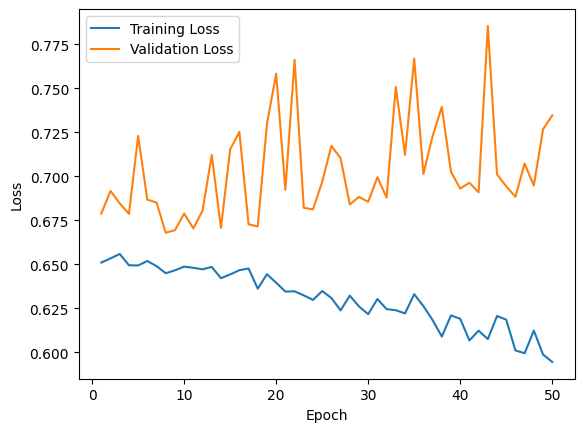

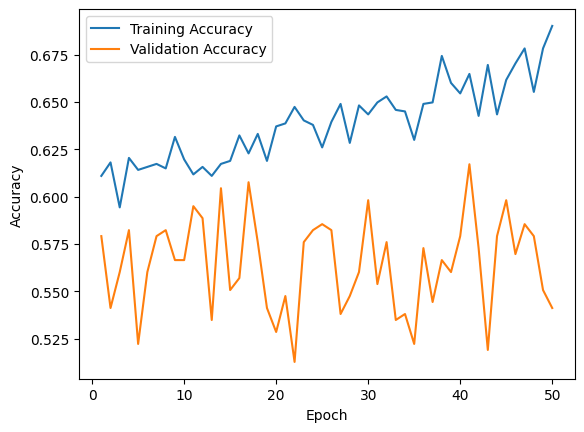

In [102]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


From the graphs, I believe that the model is overfitting. It gradually got better to training data but fails to generalize to unseen data.
The Overfitting could be due to using only ~1600 training samples

I am going to try the model again but this time including a dropout layer

In [104]:
lstm_model = Sequential()

# This tells the model to ignore zero padded vectors during training
input_layer = layers.Masking(mask_value=0., input_shape=(100, 100))
lstm_model.add(input_layer)

#This LSTM Layer processes input in both forward and backward directions
hidden_layer_1 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))
lstm_model.add(hidden_layer_1)

# This LSTM layer returns only the final hidden state
hidden_layer_2 = layers.Bidirectional(layers.LSTM(64))
lstm_model.add(hidden_layer_2)

lstm_model.add(Dropout(0.5))

output_layer = layers.Dense(units=1, activation='sigmoid')
lstm_model.add(output_layer)



lstm_model.compile(
    optimizer = sgd_optimizer,
    loss = loss_fn,
    metrics =['accuracy']  
)


t0 = time.time() # start time

num_epochs = 50

history = lstm_model.fit(
    X_train_padded, y_train, validation_split=0.2, epochs=num_epochs, callbacks = [ProgBarLoggerNEpochs(num_epochs, every_n=5)], verbose=0
)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 50], Loss: 0.6935, Accuracy: 0.5190, Val_loss: 0.6821, Val_accuracy: 0.5791
Epoch [10/ 50], Loss: 0.6836, Accuracy: 0.5642, Val_loss: 0.7019, Val_accuracy: 0.5095
Epoch [15/ 50], Loss: 0.6774, Accuracy: 0.5761, Val_loss: 0.6742, Val_accuracy: 0.5728
Epoch [20/ 50], Loss: 0.6797, Accuracy: 0.5658, Val_loss: 0.6960, Val_accuracy: 0.5348
Epoch [25/ 50], Loss: 0.6703, Accuracy: 0.5959, Val_loss: 0.6739, Val_accuracy: 0.5570
Epoch [30/ 50], Loss: 0.6683, Accuracy: 0.5967, Val_loss: 0.6839, Val_accuracy: 0.5032
Epoch [35/ 50], Loss: 0.6709, Accuracy: 0.5911, Val_loss: 0.6717, Val_accuracy: 0.6108
Epoch [40/ 50], Loss: 0.6667, Accuracy: 0.6006, Val_loss: 0.6695, Val_accuracy: 0.5949
Epoch [45/ 50], Loss: 0.6639, Accuracy: 0.6030, Val_loss: 0.6691, Val_accuracy: 0.6013
Epoch [50/ 50], Loss: 0.6669, Accuracy: 0.5856, Val_loss: 0.6741, Val_accuracy: 0.5728
Elapsed time: 155.38s


In [105]:
loss, acc = lstm_model.evaluate(X_test_padded, y_test)
print(f"Validation Accuracy: {acc:.2f}")

13/13 [==============================] - 0s 19ms/step - loss: 0.6684 - accuracy: 0.6051
Validation Accuracy: 0.61


Improved narrowly to 0.61 after including dropout regularization

So I am going to take a structured approach to improving the results:
First, Increase the sequence length to 150 words to see if it captures better
Next, I will try Adam optimizer which I've discovered to see its more fit more LSTM
Finally run a hyperparameter search  with Keras Tuner over LSTM units, dropout rate, learning rate, batch size, and number of layers.


If Accuracy doesnt reach 0.85 then I switch to logistic regression as I believe the problem could be limited data

In [110]:
lstm_model = Sequential()

# This tells the model to ignore zero padded vectors during training
input_layer = layers.Masking(mask_value=0., input_shape=(150, 100))
lstm_model.add(input_layer)

#This LSTM Layer processes input in both forward and backward directions
hidden_layer_1 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))
lstm_model.add(hidden_layer_1)

# This LSTM layer returns only the final hidden state
hidden_layer_2 = layers.Bidirectional(layers.LSTM(64))
lstm_model.add(hidden_layer_2)

lstm_model.add(Dropout(0.5))

output_layer = layers.Dense(units=1, activation='sigmoid')
lstm_model.add(output_layer)



lstm_model.compile(
    optimizer = sgd_optimizer,
    loss = loss_fn,
    metrics =['accuracy']  
)


t0 = time.time() # start time

num_epochs = 50

history = lstm_model.fit(
    X_train_padded, y_train, validation_split=0.2, epochs=num_epochs, callbacks = [ProgBarLoggerNEpochs(num_epochs, every_n=5)], verbose=0
)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 50], Loss: 0.6894, Accuracy: 0.5483, Val_loss: 0.6816, Val_accuracy: 0.5601
Epoch [10/ 50], Loss: 0.6842, Accuracy: 0.5618, Val_loss: 0.7034, Val_accuracy: 0.5032
Epoch [15/ 50], Loss: 0.6788, Accuracy: 0.5753, Val_loss: 0.6977, Val_accuracy: 0.5316
Epoch [20/ 50], Loss: 0.6770, Accuracy: 0.5753, Val_loss: 0.6809, Val_accuracy: 0.5538
Epoch [25/ 50], Loss: 0.6720, Accuracy: 0.5800, Val_loss: 0.6797, Val_accuracy: 0.5506
Epoch [30/ 50], Loss: 0.6699, Accuracy: 0.5769, Val_loss: 0.6801, Val_accuracy: 0.5601
Epoch [35/ 50], Loss: 0.6709, Accuracy: 0.5729, Val_loss: 0.7060, Val_accuracy: 0.5253
Epoch [40/ 50], Loss: 0.6700, Accuracy: 0.5808, Val_loss: 0.7231, Val_accuracy: 0.5127
Epoch [45/ 50], Loss: 0.6651, Accuracy: 0.5959, Val_loss: 0.6977, Val_accuracy: 0.5190
Epoch [50/ 50], Loss: 0.6662, Accuracy: 0.6078, Val_loss: 0.6867, Val_accuracy: 0.5759
Elapsed time: 224.75s


In [111]:
loss, acc = lstm_model.evaluate(X_test_padded, y_test)
print(f"Validation Accuracy: {acc:.2f}")

13/13 [==============================] - 0s 28ms/step - loss: 0.6897 - accuracy: 0.5418
Validation Accuracy: 0.54


Accuracy lowered which is dreadful to see. Going to try adam optimizer now

In [116]:
from tensorflow.keras.optimizers import Adam


lstm_model = Sequential()

# This tells the model to ignore zero padded vectors during training
input_layer = layers.Masking(mask_value=0., input_shape=(100, 100))
lstm_model.add(input_layer)

#This LSTM Layer processes input in both forward and backward directions
hidden_layer_1 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))
lstm_model.add(hidden_layer_1)

# This LSTM layer returns only the final hidden state
hidden_layer_2 = layers.Bidirectional(layers.LSTM(64))
lstm_model.add(hidden_layer_2)

lstm_model.add(Dropout(0.5))

output_layer = layers.Dense(units=1, activation='sigmoid')
lstm_model.add(output_layer)



lstm_model.compile(
    optimizer = Adam(learning_rate=1e-3),
    loss = loss_fn,
    metrics =['accuracy']  
)


t0 = time.time() # start time

num_epochs = 50

history = lstm_model.fit(
    X_train_padded, y_train, validation_split=0.2, epochs=num_epochs, callbacks = [ProgBarLoggerNEpochs(num_epochs, every_n=5)], verbose=0
)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 50], Loss: 0.6850, Accuracy: 0.5594, Val_loss: 0.6792, Val_accuracy: 0.5538
Epoch [10/ 50], Loss: 0.6666, Accuracy: 0.5753, Val_loss: 0.7013, Val_accuracy: 0.5443
Epoch [15/ 50], Loss: 0.6633, Accuracy: 0.5983, Val_loss: 0.6770, Val_accuracy: 0.5918
Epoch [20/ 50], Loss: 0.6516, Accuracy: 0.6094, Val_loss: 0.6717, Val_accuracy: 0.5823
Epoch [25/ 50], Loss: 0.6342, Accuracy: 0.6434, Val_loss: 0.7117, Val_accuracy: 0.5411
Epoch [30/ 50], Loss: 0.5984, Accuracy: 0.6609, Val_loss: 0.6962, Val_accuracy: 0.6076
Epoch [35/ 50], Loss: 0.5596, Accuracy: 0.7195, Val_loss: 0.7343, Val_accuracy: 0.5823
Epoch [40/ 50], Loss: 0.4834, Accuracy: 0.7678, Val_loss: 0.8230, Val_accuracy: 0.5728
Epoch [45/ 50], Loss: 0.3589, Accuracy: 0.8360, Val_loss: 0.9129, Val_accuracy: 0.5854
Epoch [50/ 50], Loss: 0.2584, Accuracy: 0.8946, Val_loss: 1.0535, Val_accuracy: 0.6044
Elapsed time: 156.70s


In [117]:
loss, acc = lstm_model.evaluate(X_test_padded, y_test)
print(f"Validation Accuracy: {acc:.2f}")

13/13 [==============================] - 0s 19ms/step - loss: 1.0574 - accuracy: 0.5722
Validation Accuracy: 0.57


Training accuracy bumped up but test accuracy is still at 0.57. So Overfitting very prevalent. Time to use Keras Tuner and RandomSearch for hyperparameter tuning

In [122]:
!pip install -q keras-tuner==1.0.4

import keras_tuner as kt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.26.4 which is incompatible.
tensorflow 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.14.1 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [123]:
import kt

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=8,              
)

tuner.search(
    X_train_padded, y_train,
    epochs=10,                
    batch_size=64,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=2)]
)

ModuleNotFoundError: No module named 'kt'

Faced problems trying to install module for hyperparameter tuning so unable to move forward with that step.
Since we are dealing with a small set of data, it is best we fall back to a simpler model like Logistic Regression. The LSTM RNN model will almost always certainly overfit due to working with less than 2000 data samples. Neural Networks tend to deal with much larger datasets.
For the Logistic Regression, the plan will be: 
- Use already Gensim preprocessed data
- Load 100-dimensional Word2Vec model on corpus
- Compute each review’s feature vector by averaging its Word2Vec embeddings
- build a Logistic Regression classifier with C as parameter
- Tune C via cross-validation
- Train the model 80:20 split
- Record accuracy, precision, recall, and F1.
- Compare against TF-IDF Vectorization

In [172]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model   import LogisticRegression
from sklearn.metrics        import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [132]:
def avg_embedding(tokens, model, dim=100):
    vecs = [word2vec_model.wv[t] for t in tokens if t in word2vec_model.wv]
    if vecs:
        return np.mean(vecs, axis=0) 
    else:
        np.zeros(dim)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [142]:
X_train_avg = np.vstack([avg_embedding(toks, word2vec_model) for toks in X_train])

X_test_avg = np.vstack([avg_embedding(toks, word2vec_model) for toks in X_test])

y_train = np.array(y_train)
y_test = np.array(y_test)

In [143]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

In [144]:
grid_avg = GridSearchCV(
    LogisticRegression(solver='liblinear', max_iter=50),
    param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_avg.fit(X_train_avg, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=50, solver='liblinear'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

Hit a convergence warning so i included liblinear solver as logistic regression parameter

In [146]:
print("Best C:", grid_avg.best_params_['C'])
clf_best = grid_avg.best_estimator_

Best C: 100


In [147]:
y_pred = clf_best.predict(X_test_avg)
accuracy_score(y_test, y_pred)

0.660759493670886

Trying TF-IDF

In [158]:
X = df["Review"]
y = df["Positive Review"]

In [159]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.25, random_state = 123) 

In [160]:
# 1. Create a TfidfVectorizer object 
tfidf_vectorizer = TfidfVectorizer(min_df = 2, ngram_range=(1,4))


# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)


# 3. Using the fitted vectorizer, transform the training data 
X_train_tfidf = tfidf_vectorizer.transform(X_train)


# 4. Using the fitted vectorizer, transform the test data 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [175]:
lrmodel = LogisticRegression(C=100)

In [176]:
lrmodel.fit(X_train_tfidf.toarray(),y_train)
lrprobability_predictions = lrmodel.predict_proba(X_test_tfidf.toarray())
class_label_predictions = lrmodel.predict(X_test_tfidf.toarray())

In [177]:
#compute log loss
l_loss = log_loss (y_test, lrprobability_predictions)
print(f"Log loss: {l_loss}")
#compute accuracy
lracc_score = accuracy_score(y_test,class_label_predictions)
print(f"Accuracy: {lracc_score}")

Log loss: 0.3699399515242565
Accuracy: 0.8238866396761133


In [178]:
#Grid search for tfidf using pipeline
param_grid_tfidf = {
    'tfidf__max_df': [0.8, 1.0],
    'tfidf__min_df': [1, 2]

}

In [186]:
pipe_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,4), min_df=2)),
    ('clf',   LogisticRegression(C = 100))
])

grid_tfidf = GridSearchCV(
    pipe_tfidf,
    param_grid=param_grid_tfidf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_tfidf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(min_df=2,
                                                        ngram_range=(1, 4))),
                                       ('clf', LogisticRegression(C=100))]),
             n_jobs=-1,
             param_grid={'tfidf__max_df': [0.8, 1.0], 'tfidf__min_df': [1, 2]},
             scoring='accuracy')

In [187]:
print("Best parameters:", grid_tfidf.best_params_)

Best parameters: {'tfidf__max_df': 1.0, 'tfidf__min_df': 2}


In [188]:
best_pipe = grid_tfidf.best_estimator_
y_pred    = best_pipe.predict(X_test)  


print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8239

              precision    recall  f1-score   support

       False       0.80      0.86      0.83       244
        True       0.86      0.78      0.82       250

    accuracy                           0.82       494
   macro avg       0.83      0.82      0.82       494
weighted avg       0.83      0.82      0.82       494



We will settle for the logistic regression model that uses tfidf vectorization to help us predict whether the book review was positive or not. It gave us the highest score of 0.8239 with recall and precision values approx 0.8 and above